<a href="https://colab.research.google.com/github/FokrulBhuiyan/Machine-Learning/blob/master/sandp500_arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

# **Collect and Explore Data**


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data into a pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/Dataset/SANDP500.csv', parse_dates=['Date'])

# Sort the DataFrame by the "Date" column in ascending order
df.sort_values(by='Date', inplace=True)

# Display the first few rows of the data to get an initial view
print(df.head())

           Date      Open      High       Low     Close Adj_Close  \
5722 2001-01-31  1,373.73  1,383.37  1,364.66  1,366.01  1,366.01   
5721 2001-02-01  1,366.01  1,373.50  1,359.34  1,373.47  1,373.47   
5720 2001-02-02  1,373.47  1,376.38  1,348.72  1,349.47  1,349.47   
5719 2001-02-05  1,349.47  1,354.56  1,344.48  1,354.31  1,354.31   
5718 2001-02-06  1,354.31  1,363.55  1,350.04  1,352.26  1,352.26   

             Volume  
5722  1,295,300,000  
5721  1,118,800,000  
5720  1,048,400,000  
5719  1,013,000,000  
5718  1,059,600,000  


In [ ]:
df.index

Int64Index([5722, 5721, 5720, 5719, 5718, 5717, 5716, 5715, 5714, 5713,
            ...
               9,    8,    7,    6,    5,    4,    3,    2,    1,    0],
           dtype='int64', length=5723)

# **Data Preprocessing:**

 Preprocessing

*   Convert the numerical columns to the appropriate data types (float).
*   Remove thousands separators (',') from numeric values.
*   Filter out rows with missing values in the "Volume" column
*   Set "Date" as the Index.

In [ ]:
first_close_value_str = str(df['Close'].iloc[0])
# Remove commas from both 'Close' and 'Volume' columns and convert them to numeric
if ',' in first_close_value_str:
  # Filter out rows with missing values in the "Volume" column
  df = df.dropna(subset=['Volume'])

  columns_to_convert = ['Close', 'Open', 'High', 'Low', 'Adj_Close']

  for column in columns_to_convert:
      df[column] = df[column].str.replace(',', '').astype(float)

  # Convert the "Date" column to a datetime column
  df['Date'] = pd.to_datetime(df['Date'])

  # Set "Date" as the index
  df.set_index('Date', inplace=True)
  df.index = pd.DatetimeIndex(df.index.values, freq=df.index.inferred_freq)
  print(df.sample(5))

else:
  print(df.sample(5))


               Open     High      Low    Close  Adj_Close         Volume
2008-05-07  1417.49  1419.54  1391.16  1392.57    1392.57  4,075,860,000
2009-08-21  1009.06  1027.59  1009.06  1026.13    1026.13  5,885,550,000
2014-03-26  1867.09  1875.92  1852.56  1852.56    1852.56  3,480,850,000
2017-07-12  2435.75  2445.76  2435.75  2443.25    2443.25  3,176,900,000
2020-06-22  3094.42  3120.92  3079.39  3117.86    3117.86  4,686,690,000


In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume'], dtype='object')

In [ ]:
df.tail(5)

,Open,High,Low,Close,Adj_Close,Volume
2023-10-24,4235.79,4259.38,4219.43,4247.68,4247.68,"3,821,820,000"
2023-10-25,4232.42,4232.42,4181.42,4186.77,4186.77,"3,869,370,000"
2023-10-26,4175.99,4183.60,4127.90,4137.23,4137.23,"4,277,640,000"
2023-10-27,4152.93,4156.70,4103.78,4117.37,4117.37,"4,019,500,000"
2023-10-30,4139.39,4177.47,4132.94,4166.82,4166.82,"3,911,140,000"


# **Stationary Check**

**Visual Inspection:**

Plot the time series data to visually inspect it for stationarity.
Let's start by visually inspecting the data for any apparent trends or seasonality. We are plotting the time series and look for any noticeable patterns.

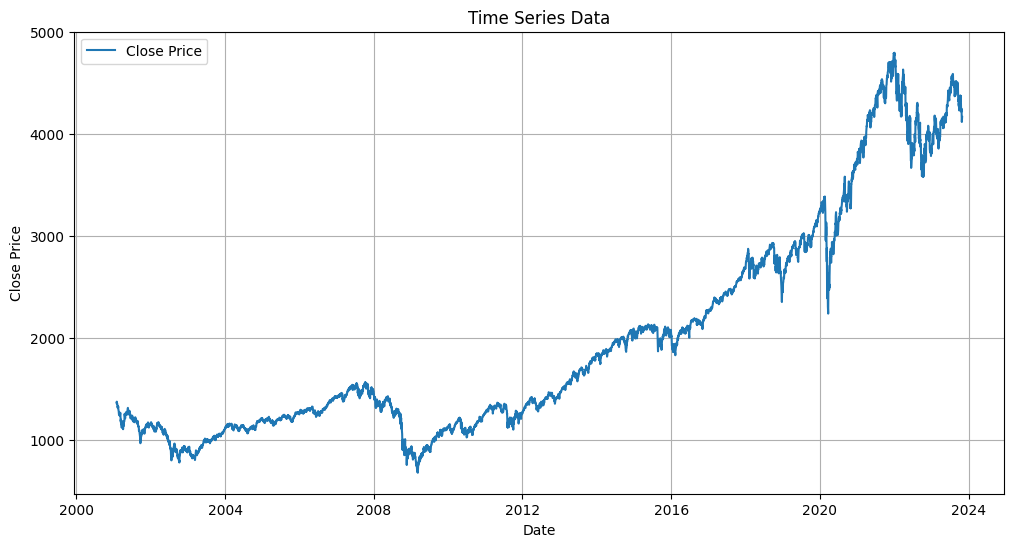

In [ ]:
# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Time Series Data')
plt.grid(True)
plt.legend()
plt.show()

**Observations:**

If you observe the trends or seasonality in the data, it may indicate non-stationarity.

**Statistical Test (ADF Test):**


The Augmented Dickey-Fuller (ADF) test is a common statistical test to check for stationarity in a time series. It tests the null hypothesis that a unit root is present in the time series data. If the p-value from the test is less than a significance level (e.g., 0.05), you can reject the null hypothesis and consider the data as stationary.

Performing the ADF test on the "Close" price data:

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
result = adfuller(df['Close'])

# Print the results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')


ADF Statistic: 0.6868460271741954
p-value: 0.9895716705018086
Critical Values:
   1%: -3.4314997807629735
   5%: -2.862048092328505
   10%: -2.5670404558300723


**Notes:** *If the p-value is less than your chosen significance level (e.g., 0.05), you can conclude that the data is stationary. Otherwise, you may need to take further steps to make it stationary, such as differencing or detrending.*


**Observations:**

The ADF Statistic is approximately  0.6868, and the p-value is approximately 0.9895. Based on these results, we can make the following observations:

ADF Statistic: The ADF Statistic is less than the critical values at the 1%, 5%, and 10% significance levels. This suggests that the ADF Statistic is not more negative than the critical values, indicating that the time series data is not strongly stationary.

p-value: The p-value (0.9895) is greater than a common significance level like 0.05. A higher p-value suggests that we fail to reject the null hypothesis, which means the data may not be stationary.

In this case, the ADF test suggests that the data is not strongly stationary. However, the p-value is close to 0.05, indicating marginal evidence against stationarity. It's possible that differencing the data may help in achieving stationarity.

# **Apply Differencing to make the data stationary**

We try differencing the data by subtracting the previous value from the current value and then perform the ADF test again. We repeat this process until we achieve stationarity or reach a reasonable level of differencing. Once we have stationary data, we can proceed with fitting an ARIMA model.

In [ ]:
# Difference the data
df['Close_diff'] = df['Close'].diff()
df = df.dropna()  # Remove the first NaN value

# Perform ADF test on differenced data
result_diff = adfuller(df['Close_diff'])

# Print the results
print('ADF Statistic (Differenced Data):', result_diff[0])
print('p-value (Differenced Data):', result_diff[1])
print('Critical Values:')
for key, value in result_diff[4].items():
    print(f'   {key}: {value}')


ADF Statistic (Differenced Data): -15.214446868515573
p-value (Differenced Data): 5.595832228439671e-28
Critical Values:
   1%: -3.4314997807629735
   5%: -2.862048092328505
   10%: -2.5670404558300723



**Observations:**

It looks like we've successfully differenced the data, and the results of the Augmented Dickey-Fuller (ADF) test on the differenced data are promising. The ADF Statistic is significantly negative, and the p-value is very close to zero (5.59e-28). This indicates that differencing has likely made our time series data stationary.

# **Finding appropriate model parameters:**


Now that we have stationary data, the next step is to choose the appropriate model parameters for our ARIMA model. To select the values for the p (AR order), d (I order), and q (MA order) parameters, we use the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots.

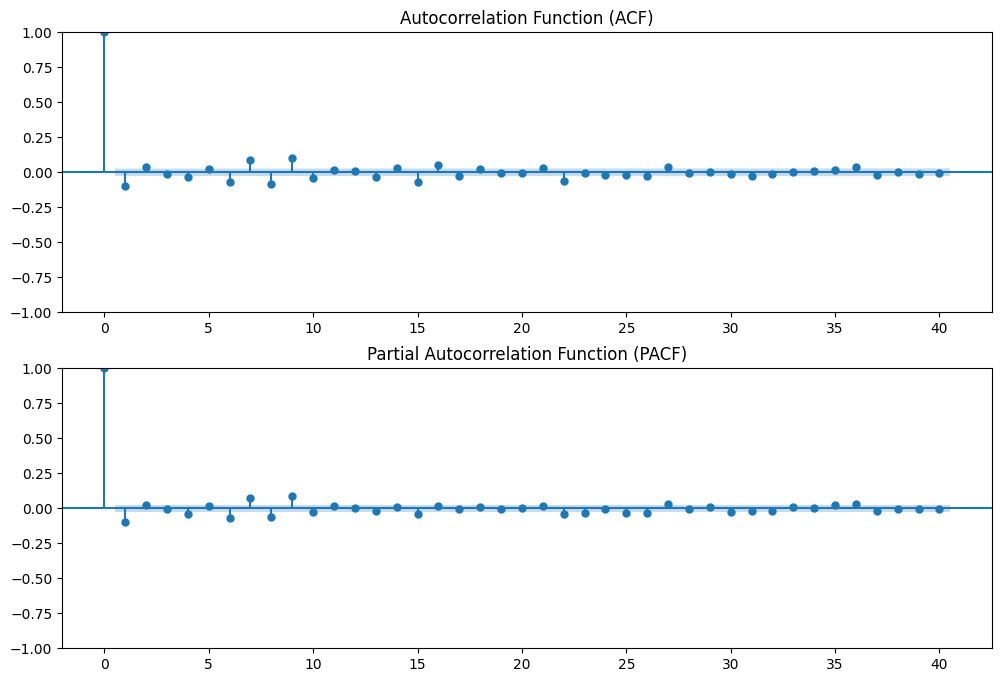

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create ACF and PACF plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# ACF plot
plot_acf(df['Close_diff'], ax=ax1, lags=40)
ax1.set_title('Autocorrelation Function (ACF)')

# PACF plot
plot_pacf(df['Close_diff'], ax=ax2, lags=40)
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.show()


**Observations:**

In these plots, we look for significant spikes in the ACF and PACF plots, which indicate the order of the AR and MA components, respectively.
For the ACF plot, the lag where the plot crosses the upper confidence interval for the first time is an indicator of the order q (MA order). In our case, it seems to cross around lag 1 or 2.

For the PACF plot, the lag where the plot crosses the upper confidence interval for the first time is an indicator of the order p (AR order). In our case, it seems to cross around lag 1 or 2 as well.

So, based on the ACF and PACF plots, it suggests that we can start with an ARIMA(2,1,2) model. This means we have an AR component of order 2, a differencing order of 1, and an MA component of order 2. However, we may need to perform some model diagnostics and fine-tuning to find the best model fit.

Now we can proceed to build and fit the ARIMA model to our data.

# **Build model ARIMA(2,1,2)**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 5722
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -26539.028
Date:                Sun, 03 Dec 2023   AIC                          53088.056
Time:                        07:56:09   BIC                          53121.316
Sample:                             0   HQIC                         53099.634
                               - 5722                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7544      0.010   -177.309      0.000      -1.774      -1.735
ar.L2         -0.8810      0.009    -94.208      0.000      -0.899      -0.863
ma.L1          1.6899      0.012    137.434      0.0

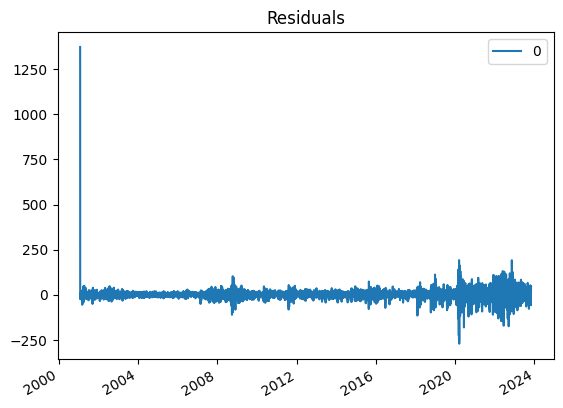

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Define the values for p, d, and q
p = 2  # AR order
d = 1  # Differencing order
q = 2  # MA order
from sklearn.preprocessing import MinMaxScaler

# # Assuming df['Close'] contains your time series data
# # Normalize the data using Min-Max scaling
# scaler = MinMaxScaler()
# scaled_data = scaler.fit_transform(df[['Close']])


# Create and fit the ARIMA model
model = ARIMA(df[['Close']], order=(p, d, q))
model_fit = model.fit()

# Display model summary
print(model_fit.summary())

# Plot the residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title='Residuals')
plt.show()


**Here's a brief overview of the key results from the model summary:**

Dep. Variable: Name of the dependent variable (Close price).

Model: The model specification, which is ARIMA(2,1,2), indicating an autoregressive order of 2, differencing of order 1, and moving average order of 2.

Log Likelihood: The log-likelihood of the model, which can be used for model comparison.

AIC (Akaike Information Criterion): A measure of model goodness-of-fit. Lower AIC values indicate a better fit.

BIC (Bayesian Information Criterion): Similar to AIC but with a penalty for the number of parameters. It helps avoid overfitting.

Parameters (coef): The estimated coefficients for the AR and MA terms.

sigma2: The estimated variance of the white noise residuals.

Ljung-Box (L1) (Q): A test statistic for assessing the independence of residuals. A low p-value (typically < 0.05) suggests that the residuals are not independent.

Jarque-Bera (JB): A test for assessing the normality of the residuals. A low p-value suggests that the residuals do not follow a normal distribution.

Heteroskedasticity (H): A test for assessing the presence of heteroskedasticity in the residuals. A low p-value suggests that heteroskedasticity is present.

Based on the provided model summary:

The AIC and BIC values are important for model selection. Lower values are generally better, so lower AIC and BIC values suggest a better model fit.

The coefficients (coef) for the AR and MA terms, along with sigma2, are the estimated parameters of the model.

The Ljung-Box test (Q) tests the independence of the residuals, and the Jarque-Bera test (JB) assesses the normality of the residuals.

The Heteroskedasticity test (H) tests for heteroskedasticity in the residuals.

# **Train and Test**

We split our data into training and testing sets. The training set is used to fit the model, and the testing set is used to evaluate its performance. We are using a common split ratio, such as 80% for training and 20% for testing.

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (e.g., 80% train, 20% test)
train_size = 0.8
split_index = int(len(df) * train_size)

train_data = df['Close'].iloc[:split_index]
test_data = df['Close'].iloc[split_index:]


**Model Fitting:**

We have already fitted the ARIMA(2,1,2) model to our entire dataset. Now, we can use the training data (train_data) for this purpose.

**Make Predictions:**

In [ ]:
# Make predictions on the test set
start_index = len(train_data)
end_index = start_index + len(test_data) - 1
predictions = model_fit.predict(start=start_index, end=end_index, typ='levels')


**Evaluate Model Performance:**

After making predictions, we can evaluate the model's performance using appropriate evaluation metrics. Common metrics for time series forecasting include Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE). We can calculate them as follows:

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate evaluation metrics
mse = mean_squared_error(test_data, predictions)
mae = mean_absolute_error(test_data, predictions)
rmse = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Squared Error (MSE): 2110.235677136071
Mean Absolute Error (MAE): 32.91165163869726
Root Mean Squared Error (RMSE): 45.93730158744711


Mean Squared Error (MSE): The MSE is a measure of the average squared difference between the model's predictions and the actual values. In our case, the MSE is 2110.24. This means, on average, the squared error between the predicted and actual values is 2110.24. Lower MSE values indicate a better fit, but the interpretation depends on the scale of our data.

Mean Absolute Error (MAE): The MAE represents the average absolute difference between the model's predictions and the actual values. With an MAE of 32.91, it indicates that, on average, the model's predictions differ from the actual values by approximately 32.91 units. Lower MAE values are better.

Root Mean Squared Error (RMSE): The RMSE is the square root of the MSE and provides a measure of the average magnitude of the prediction errors. Our RMSE is 45.94. It's in the same units as our data, and lower values indicate a better fit. RMSE is often more interpretable than MSE because it's on the same scale as the data.

# **Result visualization:**

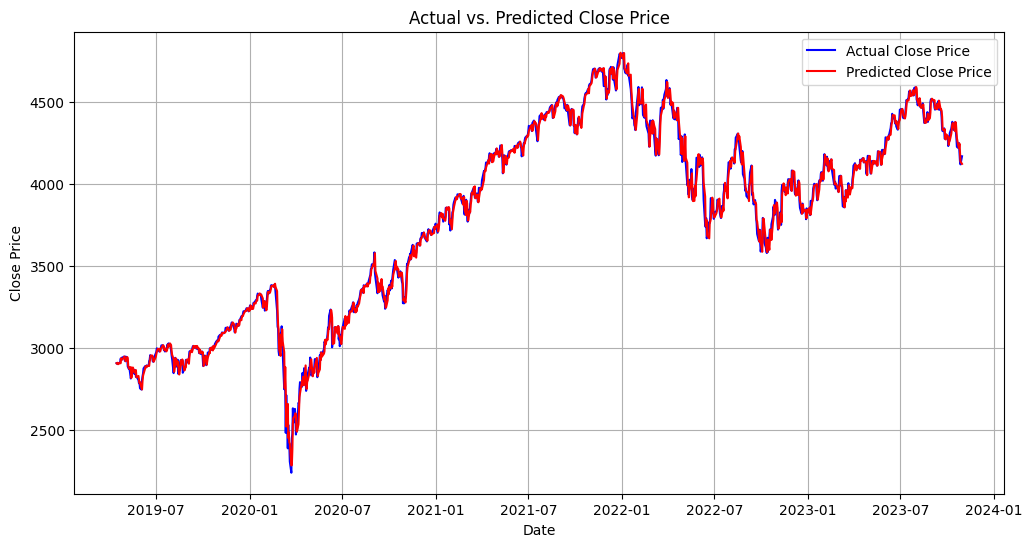

In [ ]:
import matplotlib.pyplot as plt

# Plot the actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(df.index[split_index:], test_data, label='Actual Close Price', color='blue')
plt.plot(df.index[split_index:], predictions, label='Predicted Close Price', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted Close Price')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:

# from sklearn.model_selection import TimeSeriesSplit


# # Assuming you have a time series dataset loaded into 'data'
# # Replace this with your dataset
# # data = pd.read_csv('your_dataset.csv')


# # Cross-validation to mitigate overfitting
# tscv = TimeSeriesSplit(n_splits=5)
# for train_index, val_index in tscv.split(train_data):
#     train_fold, val_fold = train_data.iloc[train_index], train_data.iloc[val_index]
#     model_fold = ARIMA(train_fold, order=(p, d, q))
#     fitted_fold = model_fold.fit()
#     val_predictions = fitted_fold.forecast(steps=len(val_fold))
#     val_mse = np.mean((val_predictions - val_fold) ** 2)
#     print(f"Validation Mean Squared Error: {val_mse}")


In [ ]:
# from sklearn.model_selection import KFold
# import statsmodels.api as sm

# kf = KFold(n_splits=5)
# rmse_scores = []

# for train_index, test_index in kf.split(train_data):
#     train_df = train_data.iloc[train_index]
#     test_df = train_data.iloc[test_index]

#     model = sm.tsa.ARIMA(train_df, order=(1, 1, 1)).fit()
#     predictions = model.predict(start=len(train_df), end=len(train_data) - 1)
#     rmse = np.sqrt(np.mean((predictions - test_df)**2))
#     rmse_scores.append(rmse)

# print('Average RMSE:', np.mean(rmse_scores))

# Build model ARIMA(1,1,1)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 5722
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -26606.062
Date:                Sun, 03 Dec 2023   AIC                          53218.123
Time:                        07:56:19   BIC                          53238.079
Sample:                             0   HQIC                         53225.070
                               - 5722                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3057      0.043     -7.031      0.000      -0.391      -0.220
ma.L1          0.2112      0.045      4.657      0.000       0.122       0.300
sigma2       641.3419      4.234    151.458      0.0

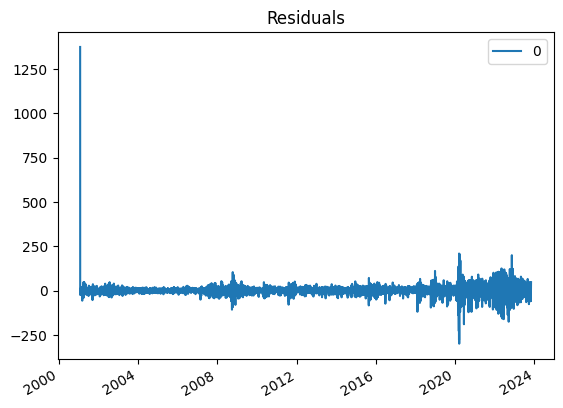

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Define the values for p, d, and q
p = 1  # AR order
d = 1  # Differencing order
q = 1  # MA order
from sklearn.preprocessing import MinMaxScaler

# # Assuming df['Close'] contains your time series data
# # Normalize the data using Min-Max scaling
# scaler = MinMaxScaler()
# scaled_data = scaler.fit_transform(df[['Close']])


# Create and fit the ARIMA model
model = ARIMA(df[['Close']], order=(p, d, q))
model_fit = model.fit()

# Display model summary
print(model_fit.summary())

# Plot the residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title='Residuals')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (e.g., 80% train, 20% test)
train_size = 0.8
split_index = int(len(df) * train_size)

train_data = df['Close'].iloc[:split_index]
test_data = df['Close'].iloc[split_index:]


In [ ]:
# Make predictions on the test set
start_index = len(train_data)
end_index = start_index + len(test_data) - 1
predictions = model_fit.predict(start=start_index, end=end_index, typ='levels')


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate evaluation metrics
mse = mean_squared_error(test_data, predictions)
mae = mean_absolute_error(test_data, predictions)
rmse = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Squared Error (MSE): 2202.6114191499723
Mean Absolute Error (MAE): 33.24874872835979
Root Mean Squared Error (RMSE): 46.931987163873345


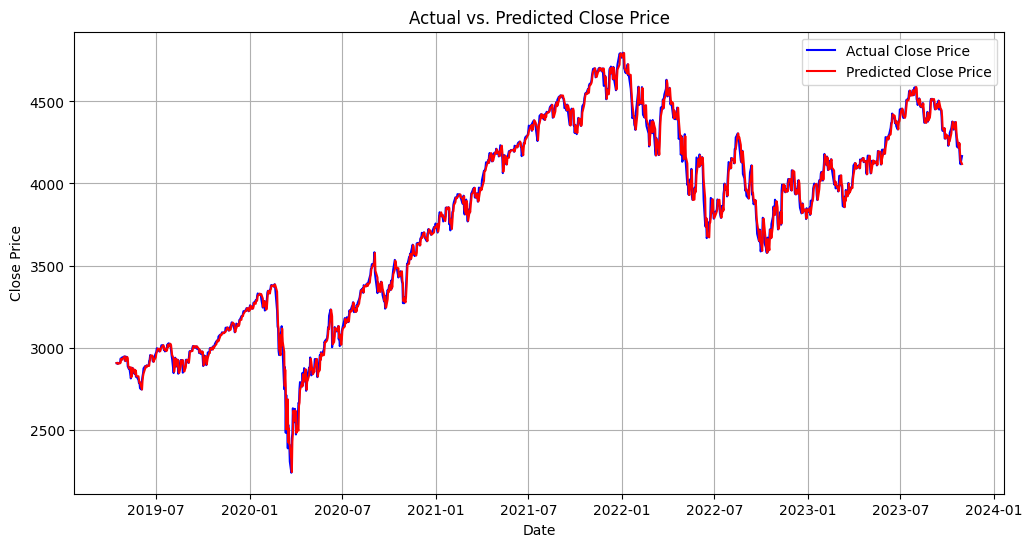

In [ ]:
import matplotlib.pyplot as plt

# Plot the actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(df.index[split_index:], test_data, label='Actual Close Price', color='blue')
plt.plot(df.index[split_index:], predictions, label='Predicted Close Price', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted Close Price')
plt.legend()
plt.grid(True)
plt.show()
